## Введение в компьютерное зрение 
### Введение в OpenCV и понимание сверточных нейронных сетей (CNN)

Материалы к семинару
* [Шпаргалка по OpenCV — Python](https://tproger.ru/translations/opencv-python-guide/) 
* [Введение в обработку изображений в Python с OpenCV](https://dev-gang.ru/article/vvedenie-v-obrabotku-izobrazhenii-v-python-s-opencv-bpvt25yc6e/)
* [О цветовых пространствах](https://habr.com/ru/post/181580/)
* [OpenCV's face detection](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php)



### Используемые библиотеки
* библиотека [numpy](https://numpy.org/)
* библиотека [matplotlib](https://matplotlib.org/)
* библиотека [pandas](https://pandas.pydata.org/)
* библиотека [seaborn](https://seaborn.pydata.org/)
* библиотека [scikit-learn](https://scikit-learn.org/stable/index.html)
* библиотека [OpenCV](https://opencv.org/)

In [24]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import os
import json
import numpy as np
import pandas as pd
import cv2

def viewImage(image,cmap=None):
    plt.figure(figsize = (8, 8))
    plt.imshow(image, cmap=cmap)
    plt.show()
    
    
def viewImage_cv2(image, name_of_window="IMG"):
    cv2.namedWindow(name_of_window, cv2.WINDOW_NORMAL)
    cv2.imshow(name_of_window, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

print(cv2.__version__)

4.8.0


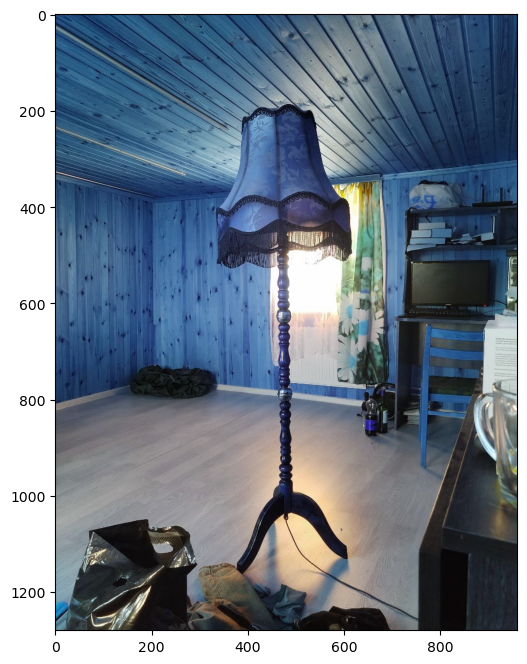

In [25]:
img = cv2.imread("images/torsher.jpg")

viewImage(img)

In [26]:
img.shape

(1280, 960, 3)

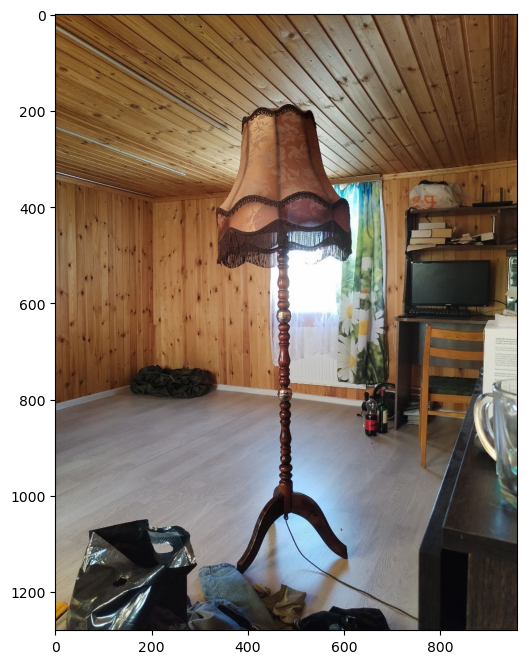

In [27]:
viewImage(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

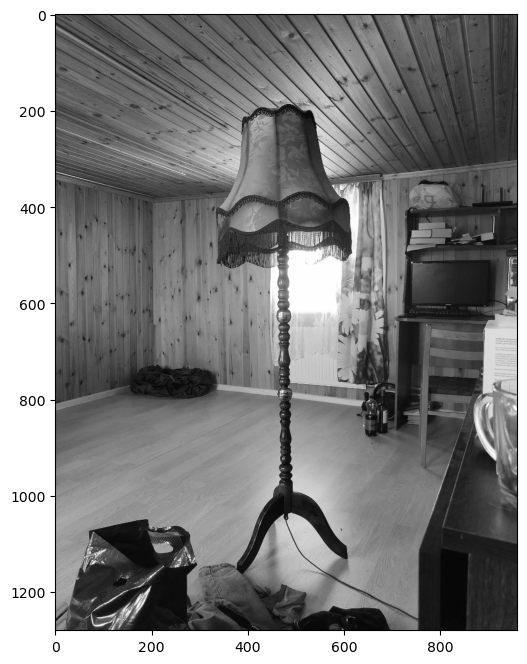

In [28]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

viewImage(gray_img, cmap="gray")

In [29]:
print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))

Image Properties
- Number of Pixels: 3686400
- Shape/Dimensions: (1280, 960, 3)


__Двумерный массив как изображение__

🎗 [Создание массивов](https://pythonworld.ru/numpy/1.html)

1280
640


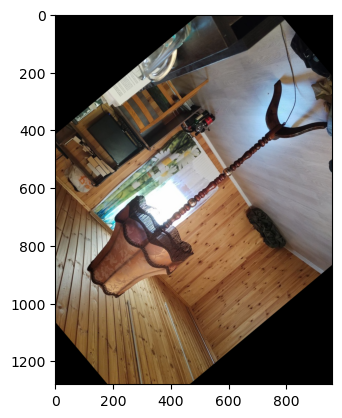

In [30]:
(h, w, d) = img.shape
print (h)
print (h // 2) ## частное от деления НА 2  нацело
(h, w, d) = img.shape
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 130, 1.0)

rotated = cv2.warpAffine(img, M, (w, h))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))   
plt.show()

__Фильтры в OpenCV__


* [Документация OpnCV](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html)
* [Савченко А.В. Цифровая обработка изображений. Лекция](https://nnov.hse.ru/data/2017/08/26/1174067833/lecture2.pdf)

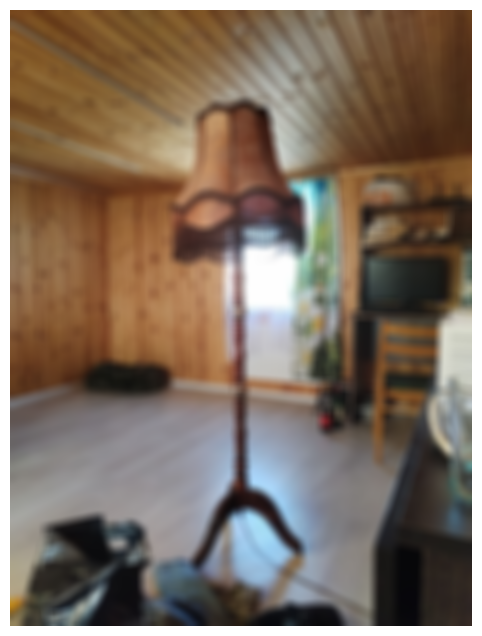

In [31]:
blurred = cv2.GaussianBlur(img, (25, 25), 10)
plt.figure(figsize = (8, 8))
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)) 
plt.axis("off")

plt.show()

__OpenCV — морфологические операции__

* erode() - размывание(операция сужения) ,
* dilate() - растягивание(операция расширения)
* morphologyEx() //MORPH_OPEN, MORPH_CLOSE 

Подробнее в [документации](https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html)

In [32]:
# задаем ядро
kernel = np.ones((2, 2), 'uint8')
kernel

array([[1, 1],
       [1, 1]], dtype=uint8)